### Importing libraries

In [1]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [3]:
### loading model

model = tf.keras.models.load_model('Trained_Model.keras')

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                   

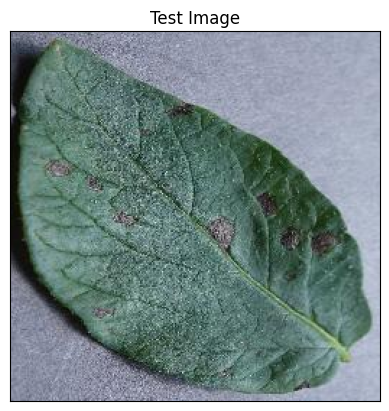

In [97]:
## visualizaton of image on test  set

import cv2
image_path = 'dataset/test/PotatoEarlyBlight3.JPG'

# Reading the image
img = cv2.imread(image_path)

# Converting the default bgr image to RGB formate
img = cv2.cvtColor(img , cv2.COLOR_BGR2RGB) 


# Displaying the image
plt.imshow(img)
plt.title("Test Image")
plt.xticks([])
plt.yticks([])
plt.show()
 

In [100]:
## tesing model

In [102]:
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(128,128))
input_array = tf.keras.preprocessing.image.img_to_array(image)
# converting image to batch
input_array = np.array([input_array]) 
print(input_array.shape)

(1, 128, 128, 3)


In [104]:
prediction = model.predict(input_array)
prediction,prediction.shape

1/1 [==============================] - 0s 32ms/step


(array([[3.4730367e-02, 1.8055715e-04, 2.8382434e-04, 5.0332946e-01,
         1.0433177e-04, 4.8563569e-03, 1.4601640e-03, 9.3608856e-04,
         2.2670104e-04, 2.0965660e-04, 4.5731086e-03, 7.3696126e-04,
         8.0776919e-04, 1.5830828e-04, 6.9736765e-05, 8.4455439e-04,
         7.8786208e-05, 2.7762631e-05, 9.0338472e-05, 1.8798686e-03,
         4.1680783e-02, 2.4343252e-03, 2.1323709e-01, 1.5801657e-04,
         2.6253104e-02, 1.4392129e-01, 9.6193238e-05, 8.4682266e-05,
         6.2680570e-05, 6.9477046e-03, 4.0532984e-03, 4.6993359e-03,
         4.7919551e-05, 1.2793741e-04, 3.6049375e-04, 6.7924819e-05,
         7.1306349e-05, 1.1116475e-04]], dtype=float32),
 (1, 38))

In [106]:
result_index = np.argmax(prediction)
result_index

3

In [108]:
class_name = ['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

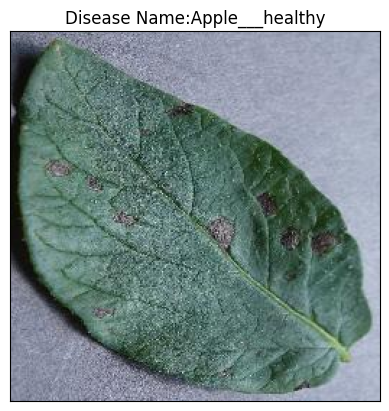

In [110]:
# displaying the result
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name:{model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()